# Regression of Time of Day Accidents Occurred vs. Day of the Week Accidents Occurred

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression/Modelling libraries
from scipy.stats import linregress

In [2]:
# Read in the cleaned data
df = pd.read_csv("../Data/cleaned_car_crash_data.csv")

# Display first 5 rows
df.head()

,index,year,month,day,hour,collision_type,injury_type,primary_factor,reported_location,latitude,longitude
0,0,2015,1,5,0.0,2-Car,No injury/unknown,OTHER,1ST & FESS,39.159207,-86.525874
1,1,2015,1,6,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2,2015,1,6,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,3,2015,1,7,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,4,2015,1,7,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [3]:
# Remove the redundant index column
df = df.drop("index", axis=1)

### Scatterplot of Time of Day v. Injury Severity
---

In [5]:
# Add new column titled "injury_severity" and assign values to that column based on values in injury_type
# Copy existing DataFrame to add a new column
sig_df = df.copy()

# Adding an empty column to copy_df; code from Carsten on https://stackoverflow.com/a/57293727/23471668
sig_df["injury_severity"] = pd.Series(dtype="int64")

# Iterate through the sig_df DataFrame
for index, row in sig_df.iterrows():
    if row.injury_type == "No injury/unknown":
        sig_df.loc[index, "injury_severity"] = 0 # For accidents with no injury, the severity is 0, because it is the least severe injury type
    elif row.injury_type == "Non-incapacitating":
        sig_df.loc[index, "injury_severity"] = 33
    elif row.injury_type == "Incapacitating":
        sig_df.loc[index, "injury_severity"] = 66
    elif row.injury_type == "Fatal":
        sig_df.loc[index, "injury_severity"] = 100 # For accidents with no injury, the severity is 100 since it is the most severe injury type

In [6]:
# Get a sample of the data
sample_sig_df = sig_df.sample(500)

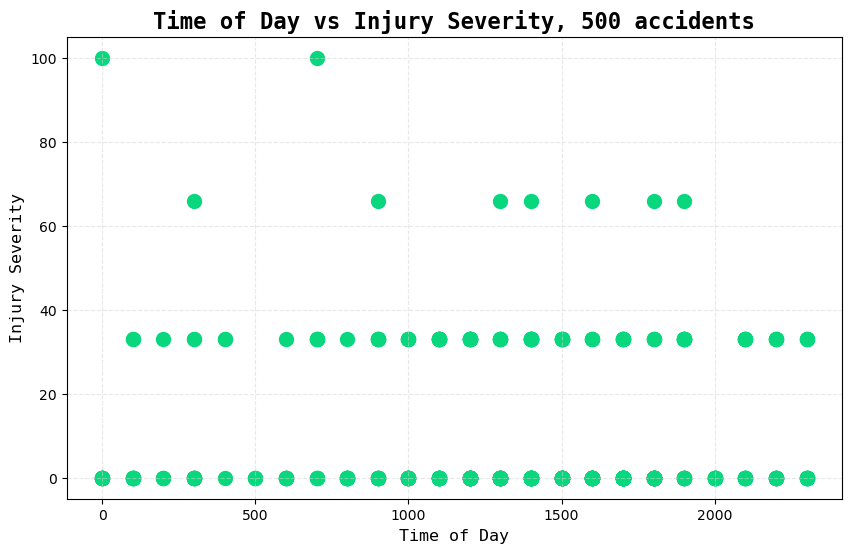

In [7]:
# Make the scatterplot
# Step 1: Get the Data
x = sample_sig_df.hour
y = sample_sig_df.injury_severity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, color="#08d77d", s=100)

# Step 4: Customizations
plt.xlabel("Time of Day", fontsize=12, fontfamily="monospace")
plt.ylabel("Injury Severity", fontsize=12, fontfamily="monospace")
plt.title("Time of Day vs Injury Severity, 500 accidents", fontweight="bold", fontsize=16, fontfamily="monospace")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

### Regression for the Time of Day v. Injury Severity
---

The r2-value is: 0.0010843495122650508
The line equation is: y = -0.0x + 10.35


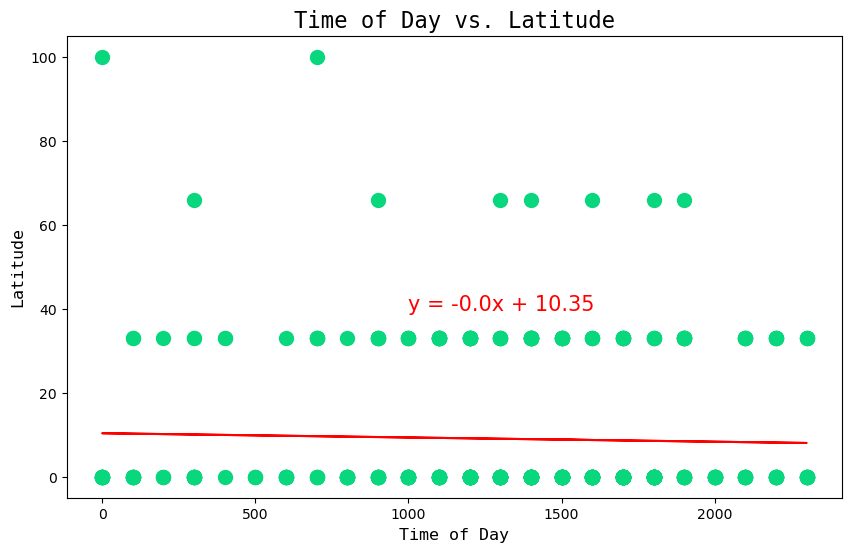

In [41]:
# Scatterplot
# Step 1: Get the Data
x = sample_sig_df.hour
y = sample_sig_df.injury_severity

# Makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Make the canvas
plt.figure(figsize=(10,6))

# Make the basic plot
plt.scatter(x, y, color="#08d77d", s=100)
plt.plot(x,regress_values,"r-")

# Customizations
plt.title("Time of Day vs. Latitude", fontsize=16, fontfamily="monospace")
plt.xlabel("Time of Day", fontsize=12, fontfamily="monospace")
plt.ylabel("Latitude", fontsize=12, fontfamily="monospace")

plt.grid(color="lightgrey", linestyle="--", alpha=0)

plt.annotate(line_eq,(1000,39.6),fontsize=15,color="red")


print(f"The r2-value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")
plt.show()

### Correlation Heatmap between all numeric variable
---
Looking at the correlation leaderboard and heatmap, there are no significant correlations between any of the base numeric values

,year,month,day,hour,latitude,longitude,injury_severity
year,1.000000,-0.005814,-0.004638,-0.017863,0.065500,-0.065370,-0.015879
month,-0.005814,1.000000,-0.010203,0.011229,-0.015801,0.015908,0.015631
day,-0.004638,-0.010203,1.000000,0.006592,0.004276,-0.004405,-0.007034
hour,-0.017863,0.011229,0.006592,1.000000,0.007345,-0.007329,0.008429
latitude,0.065500,-0.015801,0.004276,0.007345,1.000000,-0.999389,0.044498
longitude,-0.065370,0.015908,-0.004405,-0.007329,-0.999389,1.000000,-0.044171
injury_severity,-0.015879,0.015631,-0.007034,0.008429,0.044498,-0.044171,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

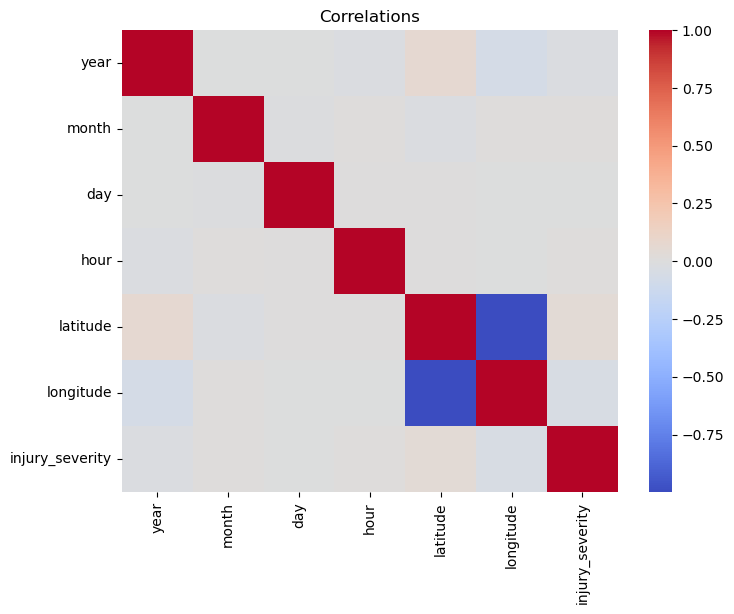

In [9]:
# Creating a heatmap
corrs = sig_df.corr(numeric_only=True)

plt.figure(figsize=(8,6))

sns.heatmap(corrs, cmap="coolwarm")
plt.title("Correlations")

display(corrs)
plt.show